In [37]:
import pandas as pd
import numpy as np # We will also be needing numpy as pandas is tightly integrated with numpy
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from scipy.interpolate import interp1d
from plotly.graph_objs.layout import YAxis,XAxis


In [2]:
df = pd.read_csv('Untitled 2.csv')
df_clean = df[['pos','ref','A','C','T','G']]
df_melt = df_clean.melt(
    id_vars=['pos','ref'],
    var_name='nucleotide'
)
df_melt

,pos,ref,nucleotide,value
0,1,T,A,0
1,2,G,A,0
2,3,C,A,0
3,4,A,A,164
4,5,C,A,0
...,...,...,...,...
32679,8167,T,G,0
32680,8168,T,G,0
32681,8169,G,G,237
32682,8170,G,G,218


In [32]:
df_melt
df_melt["x"] = df_melt['pos'].astype(str) + df_melt["ref"]
df_melt

,pos,ref,nucleotide,value,x
0,1,T,A,0,1T
1,2,G,A,0,2G
2,3,C,A,0,3C
3,4,A,A,164,4A
4,5,C,A,0,5C
...,...,...,...,...,...
32679,8167,T,G,0,8167T
32680,8168,T,G,0,8168T
32681,8169,G,G,237,8169G
32682,8170,G,G,218,8170G


In [54]:
fig = go.Figure()


fig = px.line(df_melt, x="pos", y="value", color="nucleotide", line_shape='spline', render_mode="svg")
fig.update_layout(
    xaxis=dict(
        autorange=True,
        range=(["1", "300"]),
        rangeslider=dict(
            autorange=True,
            range=["1", "50"]
        ),
        type="linear"
    ))

fig.write_html("test nucleotide seq.html")

In [53]:
fig = go.Figure()
fig = px.line(df_melt, x="pos", y="value", color="nucleotide")


# Set title
fig.update_layout(
    title_text="Time series with range slider and selectors"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        autorange=True,
        range=(["1", "50"]),
        rangeslider=dict(
            autorange=True,
            range=["1", "50"]
        ),
        type="linear"
    ))


fig.write_html("test nucleotide seq.html")

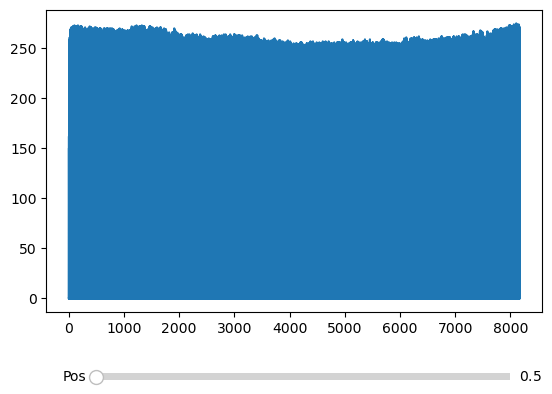

In [10]:
Plot, Axis = plt.subplots()
plt.subplots_adjust(bottom=0.25)
l = plt.plot(df_melt['pos'], df_melt['value'])
slider_color = 'White'
axis_position = plt.axes([0.2, 0.1, 0.65, 0.03],
                         facecolor = slider_color)
slider_position = Slider(axis_position,
                         'Pos', 0.1, 90.0)
def update(val):
    pos = slider_position.val
    Axis.axis([pos, pos+10, -1, 1])
    Plot.canvas.draw_idle()
slider_position.on_changed(update)
plt.show()

<AxesSubplot:xlabel='pos', ylabel='value'>

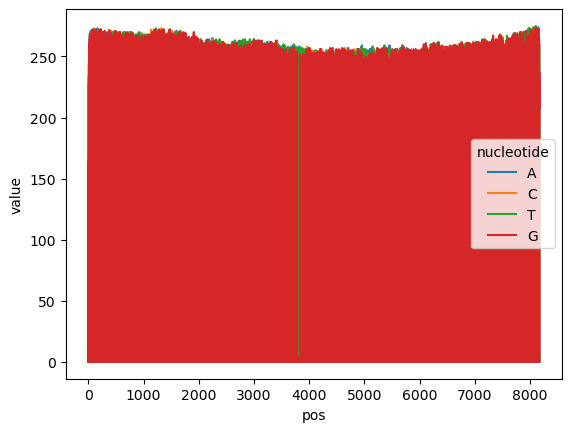

In [6]:
sns.lineplot(data = df_melt, x = 'pos', y = 'value', hue='nucleotide')